In [1]:
# For development purposes, reload imported modules when source changes
%load_ext autoreload
%autoreload 2

import spikeinterface as si
import spikewidgets as sw
import os, sys
import numpy as np

from mountainlab_pytools import mlproc as mlp
from mountainlab_pytools import mdaio

from gen_synth_datasets import gen_synth_datasets

import h5py
import json

from matplotlib import pyplot as plt

In [2]:
K=15

datasets=[]
ds0=dict(
    duration=600,
    noise_level=10,
    K=K
)
num_datasets=3

for j in range(1,num_datasets+1):
    ds=dict(        
        name='{}_synth'.format('{0:03d}'.format(j)),
        duration=60,
        noise_level=10,
        seed=j
    )
    for key in ds0:
        ds[key]=ds0[key]
    datasets.append(ds)
    
print('DATASETS:')
print([ds['name'] for ds in datasets])

DATASETS:
['001_synth', '002_synth', '003_synth']


In [3]:
 gen_synth_datasets(datasets,outdir='datasets')

In [4]:
IXs = [si.MdaInputExtractor(dataset_directory='datasets/'+ds['name']) for ds in datasets]
OXs = [si.MdaOutputExtractor(firings_file='datasets/'+ds['name']+'/firings_true.mda') for ds in datasets]
IX=si.MultiInputExtractor(input_extractors=IXs, epoch_names=['A','B','C'])
OX=si.MultiOutputExtractor(input_extractors=IXs, output_extractors=OXs, epoch_names=['A','B','C'])
sw.TimeseriesWidget(input_extractor=IX).display()

In [5]:
sw.TimeseriesWidget(input_extractor=IXs[1]).display()
sw.TimeseriesWidget(input_extractor=IX.getEpoch('B')).display()

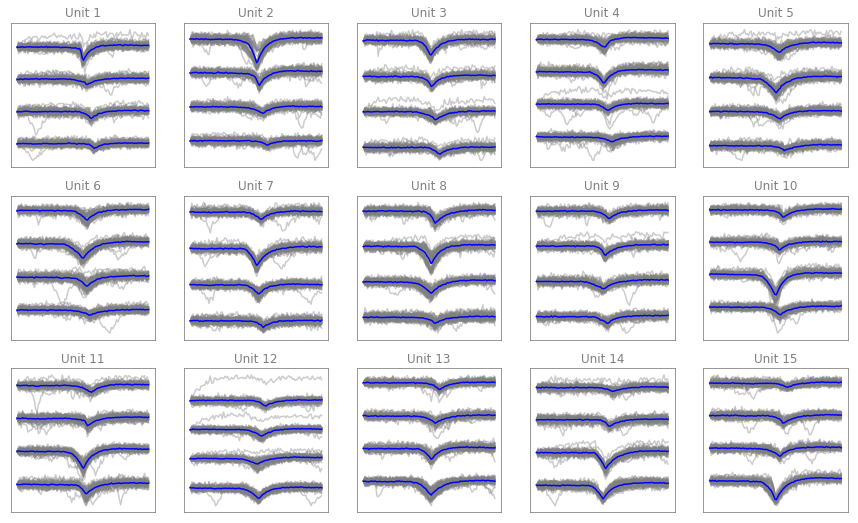

In [8]:
IX_sub=si.SubInputExtractor(parent_extractor=IX,start_frame=10000,end_frame=IX.getNumFrames())
OX_sub=si.SubOutputExtractor(parent_extractor=OX,start_frame=10000,end_frame=IX.getNumFrames())
sw.UnitWaveformsWidget(input_extractor=IX_sub,output_extractor=OX_sub,snippet_len=100).plot()